# Unitree Go2 RL Hardware Implementation Datalog Plotting
Author: Arjun Viswanathan \
Date created: 9/2/25 \
Date last modified: 9/2/25

Plotting the commanded vs observed joint positions from the RL policy, in sim and physical world

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import matplotlib.image as mpimg
from matplotlib import rcParams
import numpy as np
from itertools import chain 
import os

In [3]:
# run_name = "grasp_hold_log.npz"
save_folder = f"/home/arjun-laptop/Documents/AssistiveRobotics_FP/mujoco/allegro_hand/plots"
data_folder = f"/home/arjun-laptop/Documents/AssistiveRobotics_FP/mujoco/allegro_hand/logs"

os.makedirs(save_folder, exist_ok=True)

In [26]:
npz_file = os.path.join(data_folder, "grasp_hold_log.npz")
log_file = np.load(npz_file)

# Simulated World

In [27]:
t = np.arange(0, len(log_file['desired_pos'])) / 120  # timesteps in seconds

desired_pos = log_file['desired_pos']  # (timesteps, 16)
actual_pos = log_file['actual_pos']    # (timesteps, 16)
desired_lin_vel = log_file['desired_lin_vel']  # (timesteps, 3)
actual_lin_vel = log_file['actual_lin_vel']    # (timesteps, 3)
desired_rpy = log_file['desired_rpy']  # (timesteps, 3)
actual_rpy = log_file['actual_rpy']    # (timesteps, 3
desired_ang_vel = log_file['desired_ang_vel']  # (timesteps, 3)
actual_ang_vel = log_file['actual_ang_vel']    # (timesteps, 3

f_impedance = log_file['impedance_controller_forces']  # (timesteps, 12)
f_qp = log_file['qp_forces']            # (timesteps, 12)
f_ns = log_file['nullspace_controller_forces']            # (timesteps, 12)
f_total = log_file['total_forces']        # (timesteps, 12)
f_applied = log_file['applied_forces']      # (timesteps, 12)

f_total_norm_force = np.linalg.norm(f_total.reshape(-1, 4, 3), axis=1)  # (timesteps, 3)
f_total_applied_norm_force = np.linalg.norm(f_applied.reshape(-1, 4, 3), axis=1)  # (timesteps, 3)

In [28]:
start = 0
stop = len(t)

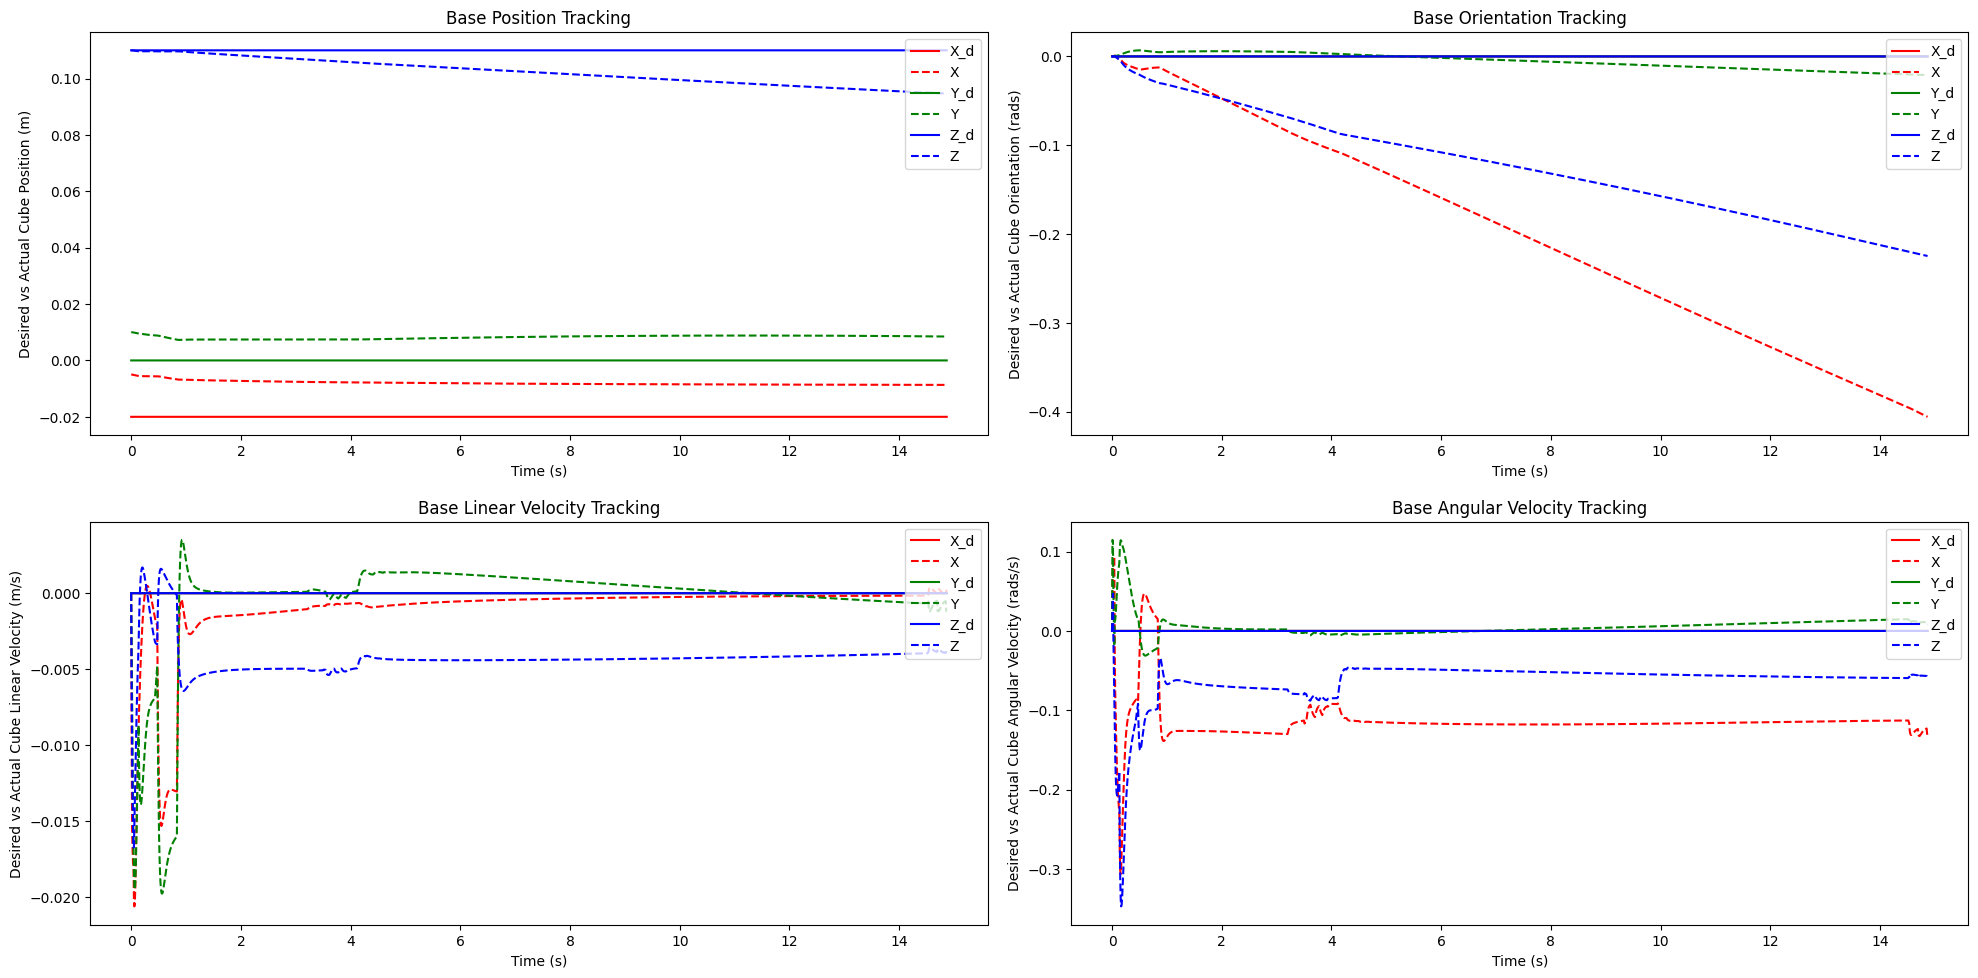

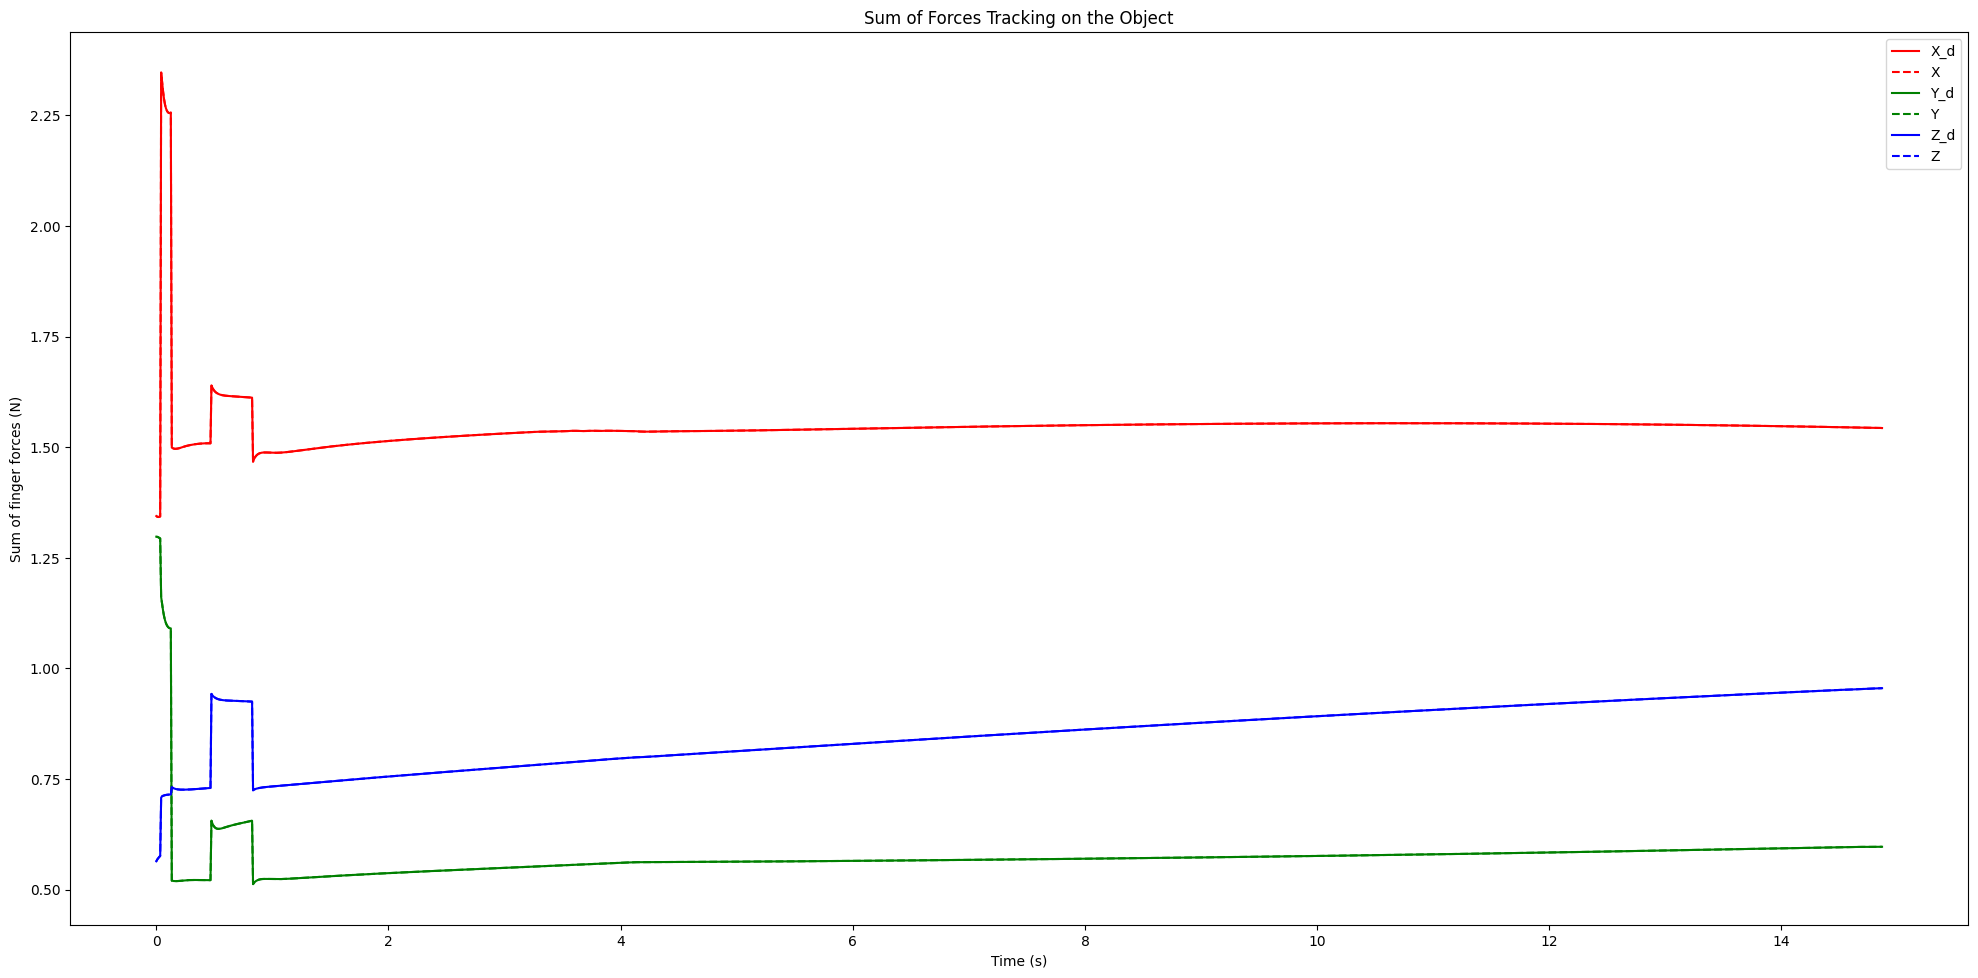

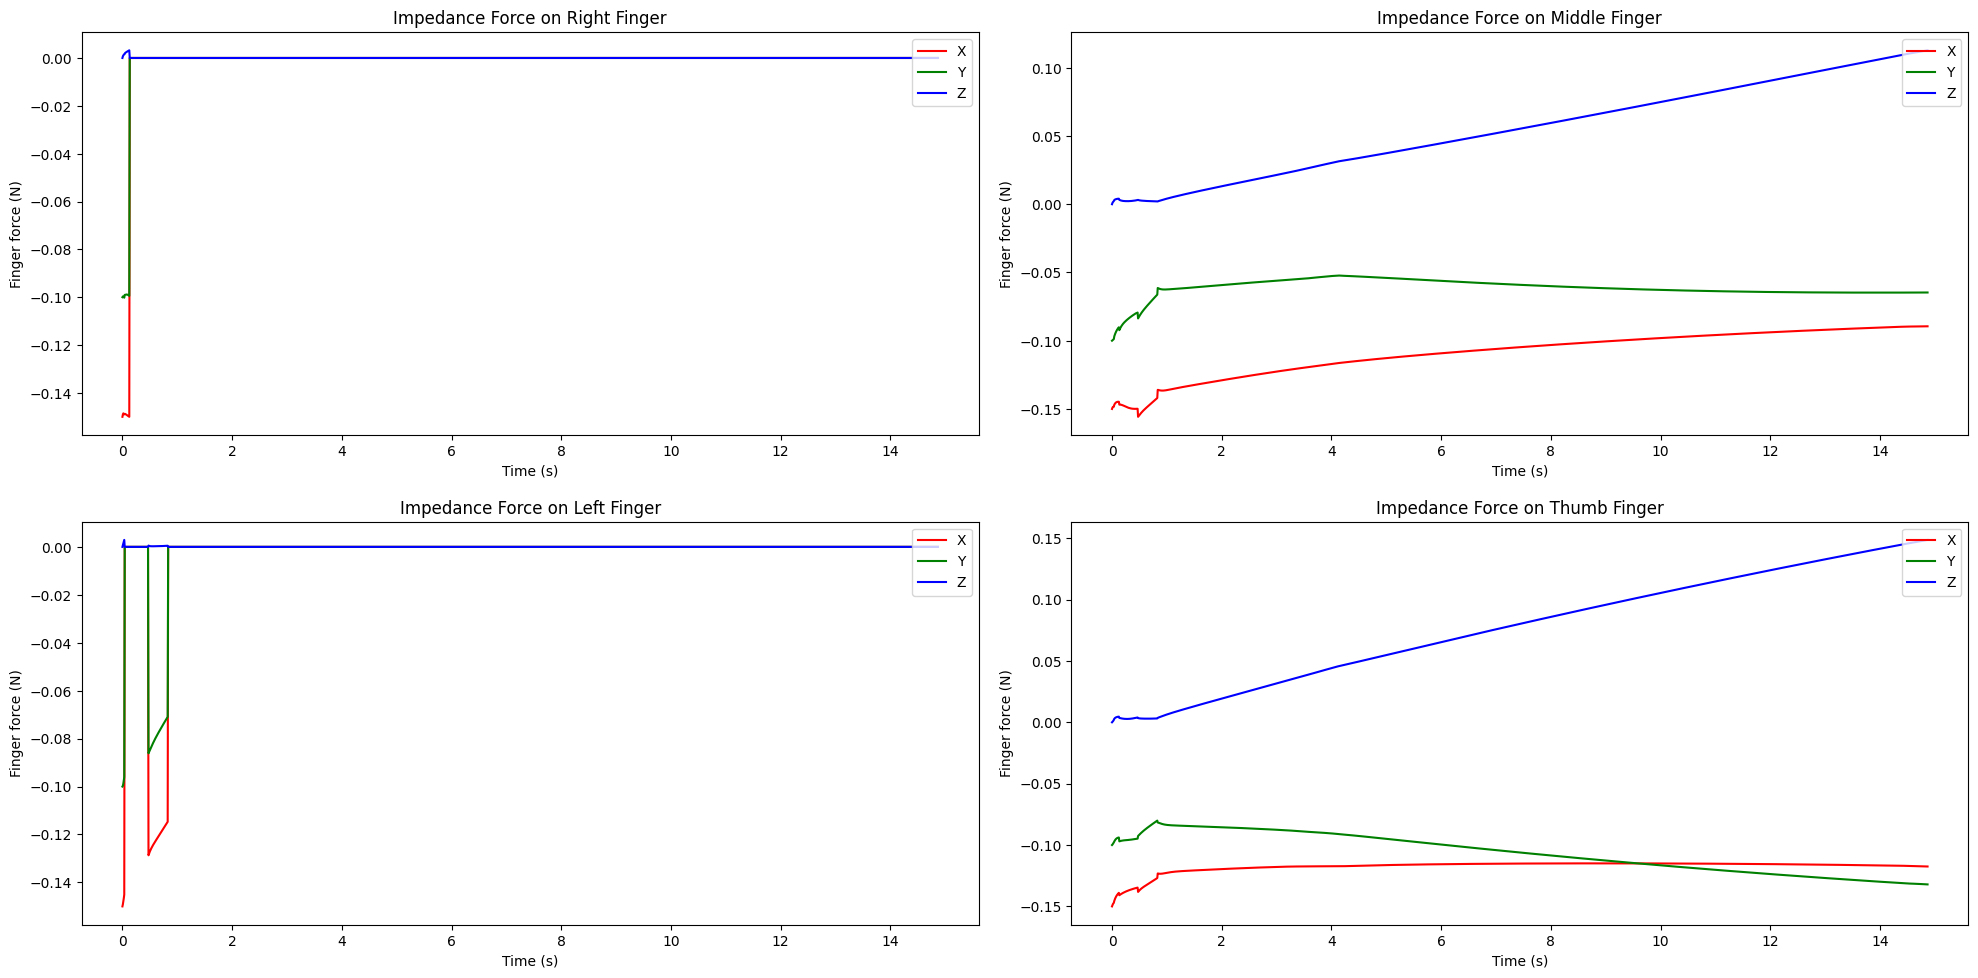

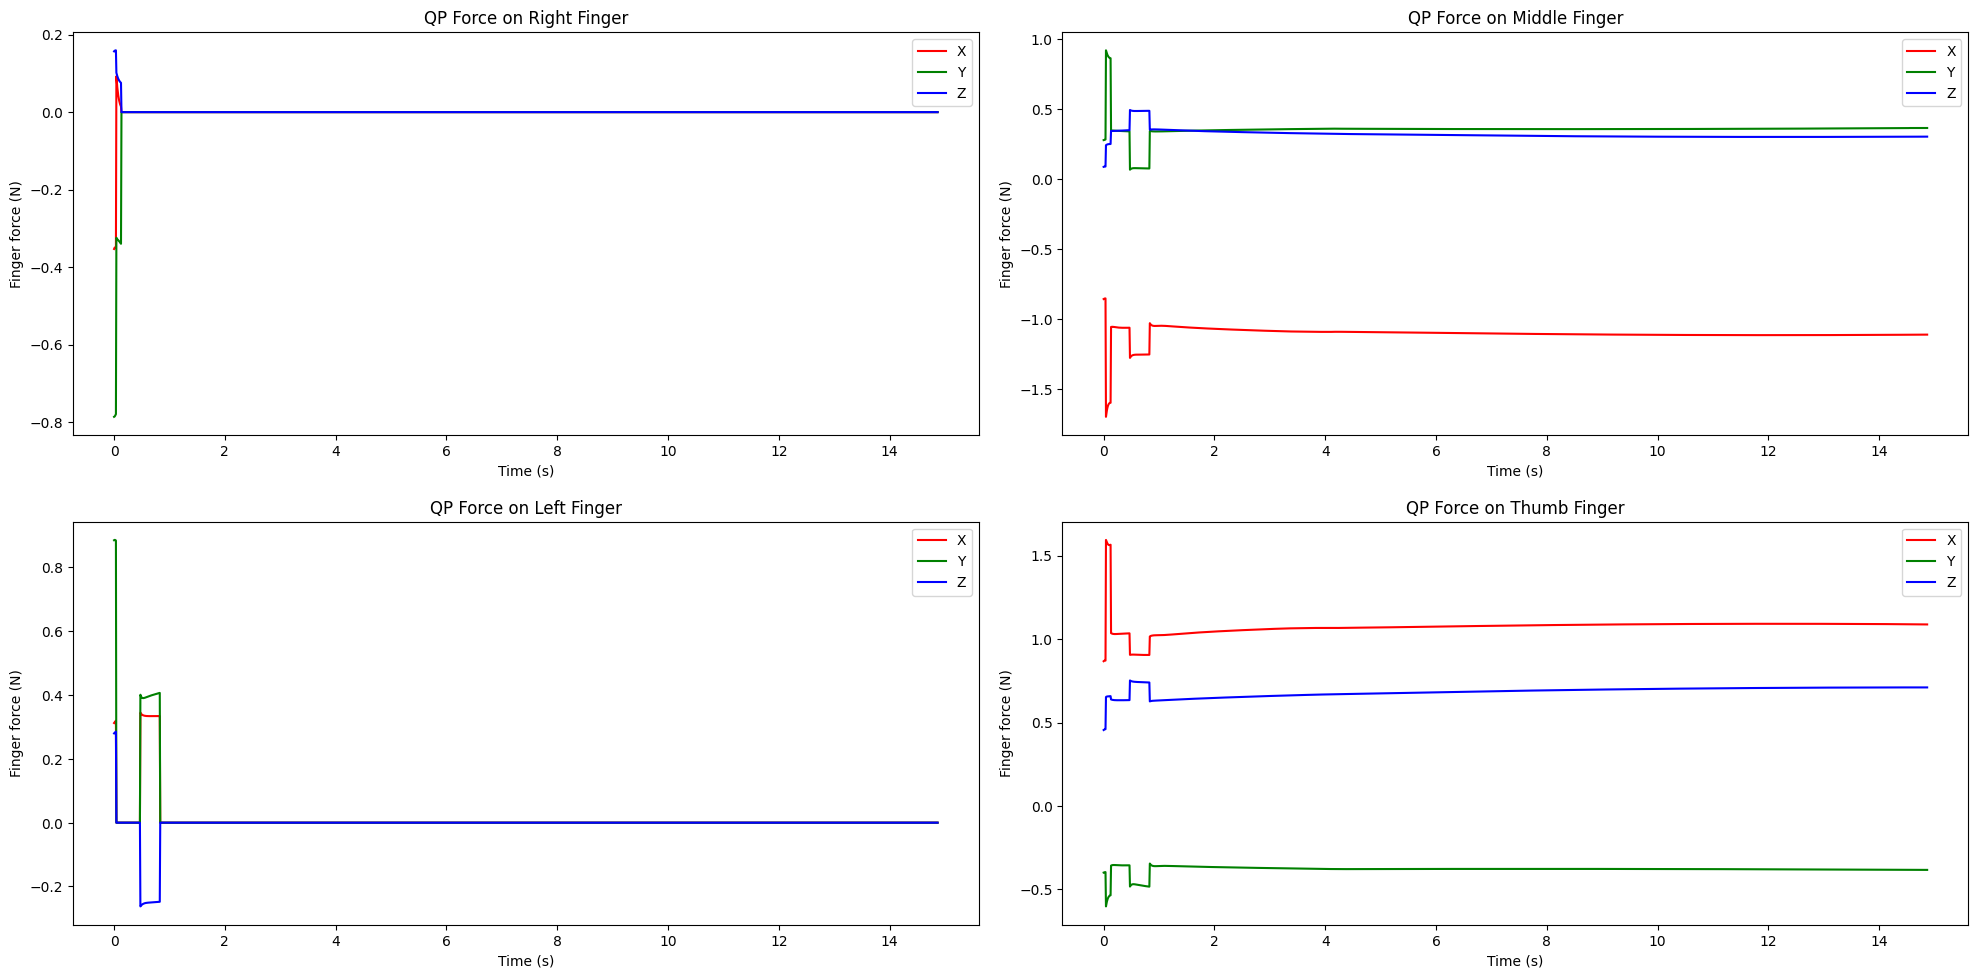

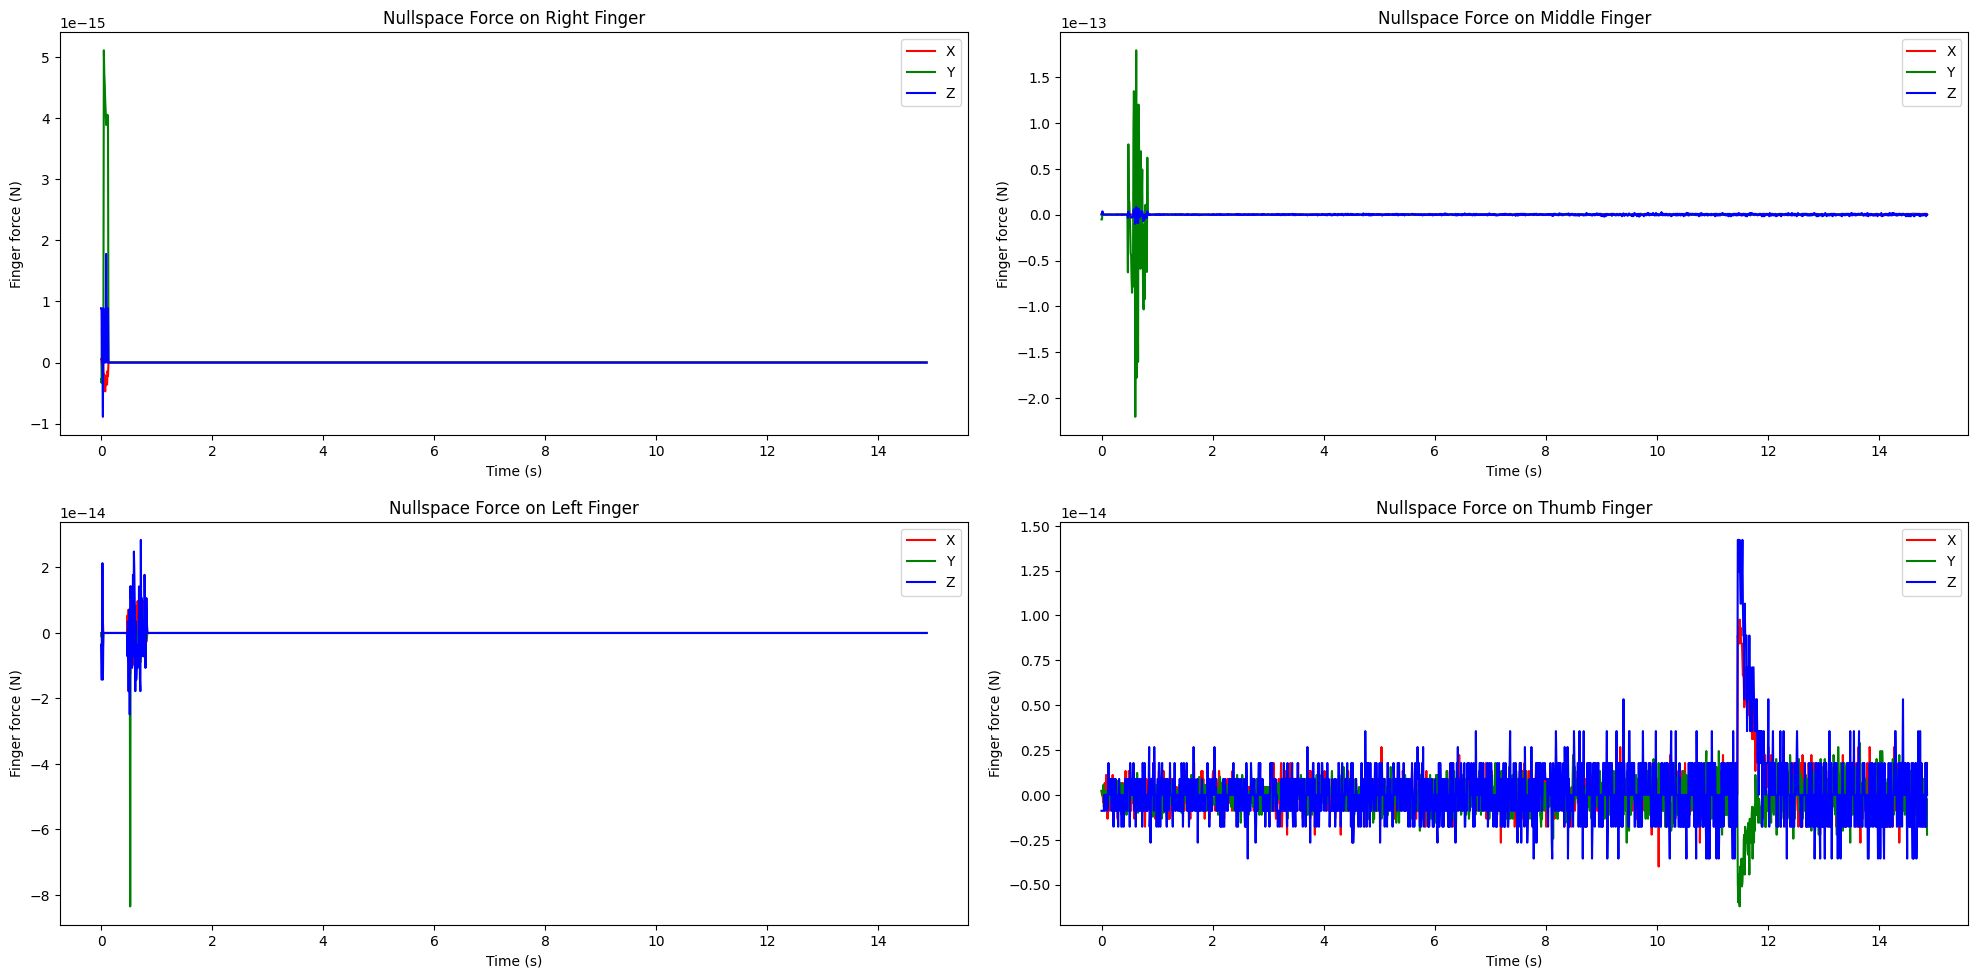

In [29]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

ax[0,0].plot(t[start:stop], desired_pos[start:stop, 0], c='r')
ax[0,0].plot(t[start:stop], actual_pos[start:stop, 0], c='r', linestyle='dashed')
ax[0,0].plot(t[start:stop], desired_pos[start:stop, 1], c='g')
ax[0,0].plot(t[start:stop], actual_pos[start:stop, 1], c='g', linestyle='dashed')
ax[0,0].plot(t[start:stop], desired_pos[start:stop, 2], c='b')
ax[0,0].plot(t[start:stop], actual_pos[start:stop, 2], c='b', linestyle='dashed')
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("Desired vs Actual Cube Position (m)")
ax[0,0].legend(['X_d', 'X', 'Y_d', 'Y', 'Z_d', 'Z'], loc='upper right')
ax[0,0].set_title("Base Position Tracking")

ax[0,1].plot(t[start:stop], desired_rpy[start:stop, 0], c='r')
ax[0,1].plot(t[start:stop], actual_rpy[start:stop, 0], c='r', linestyle='dashed')
ax[0,1].plot(t[start:stop], desired_rpy[start:stop, 1], c='g')
ax[0,1].plot(t[start:stop], actual_rpy[start:stop, 1], c='g', linestyle='dashed')
ax[0,1].plot(t[start:stop], desired_rpy[start:stop, 2], c='b')
ax[0,1].plot(t[start:stop], actual_rpy[start:stop, 2], c='b', linestyle='dashed')
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Desired vs Actual Cube Orientation (rads)")
ax[0,1].legend(['X_d', 'X', 'Y_d', 'Y', 'Z_d', 'Z'], loc='upper right')
ax[0,1].set_title("Base Orientation Tracking")

ax[1,0].plot(t[start:stop], desired_lin_vel[start:stop, 0], c='r')
ax[1,0].plot(t[start:stop], actual_lin_vel[start:stop, 0], c='r', linestyle='dashed')
ax[1,0].plot(t[start:stop], desired_lin_vel[start:stop, 1], c='g')
ax[1,0].plot(t[start:stop], actual_lin_vel[start:stop, 1], c='g', linestyle='dashed')
ax[1,0].plot(t[start:stop], desired_lin_vel[start:stop, 2], c='b')
ax[1,0].plot(t[start:stop], actual_lin_vel[start:stop, 2], c='b', linestyle='dashed')
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("Desired vs Actual Cube Linear Velocity (m/s)")
ax[1,0].legend(['X_d', 'X', 'Y_d', 'Y', 'Z_d', 'Z'], loc='upper right')
ax[1,0].set_title("Base Linear Velocity Tracking")

ax[1,1].plot(t[start:stop], desired_ang_vel[start:stop, 0], c='r')
ax[1,1].plot(t[start:stop], actual_ang_vel[start:stop, 0], c='r', linestyle='dashed')
ax[1,1].plot(t[start:stop], desired_ang_vel[start:stop, 1], c='g')
ax[1,1].plot(t[start:stop], actual_ang_vel[start:stop, 1], c='g', linestyle='dashed')
ax[1,1].plot(t[start:stop], desired_ang_vel[start:stop, 2], c='b')
ax[1,1].plot(t[start:stop], actual_ang_vel[start:stop, 2], c='b', linestyle='dashed')
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Desired vs Actual Cube Angular Velocity (rads/s)")
ax[1,1].legend(['X_d', 'X', 'Y_d', 'Y', 'Z_d', 'Z'], loc='upper right')
ax[1,1].set_title("Base Angular Velocity Tracking")
plt.tight_layout(pad=1.5)
plt.savefig(f"{save_folder}/state_tracking.png")
plt.show()

fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax.plot(t[start:stop], f_total_norm_force[start:stop, 0], c='r')
ax.plot(t[start:stop], f_total_applied_norm_force[start:stop, 0], c='r', linestyle='dashed')
ax.plot(t[start:stop], f_total_norm_force[start:stop, 1], c='g')
ax.plot(t[start:stop], f_total_applied_norm_force[start:stop, 1], c='g', linestyle='dashed')
ax.plot(t[start:stop], f_total_norm_force[start:stop, 2], c='b')
ax.plot(t[start:stop], f_total_applied_norm_force[start:stop, 2], c='b', linestyle='dashed')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Sum of finger forces (N)")
ax.legend(['X_d', 'X', 'Y_d', 'Y', 'Z_d', 'Z'], loc='upper right')
ax.set_title("Sum of Forces Tracking on the Object")

plt.tight_layout(pad=1.5)
plt.savefig(f"{save_folder}/total_force_tracking.png")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(20, 10))

ax[0,0].plot(t[start:stop], f_impedance[start:stop, 0], c='r')
ax[0,0].plot(t[start:stop], f_impedance[start:stop, 1], c='g')
ax[0,0].plot(t[start:stop], f_impedance[start:stop, 2], c='b')
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("Finger force (N)")
ax[0,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,0].set_title("Impedance Force on Right Finger")

ax[0,1].plot(t[start:stop], f_impedance[start:stop, 3], c='r')
ax[0,1].plot(t[start:stop], f_impedance[start:stop, 4], c='g')
ax[0,1].plot(t[start:stop], f_impedance[start:stop, 5], c='b')
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Finger force (N)")
ax[0,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,1].set_title("Impedance Force on Middle Finger")

ax[1,0].plot(t[start:stop], f_impedance[start:stop, 6], c='r')
ax[1,0].plot(t[start:stop], f_impedance[start:stop, 7], c='g')
ax[1,0].plot(t[start:stop], f_impedance[start:stop, 8], c='b')
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("Finger force (N)")
ax[1,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,0].set_title("Impedance Force on Left Finger")

ax[1,1].plot(t[start:stop], f_impedance[start:stop, 9], c='r')
ax[1,1].plot(t[start:stop], f_impedance[start:stop, 10], c='g')
ax[1,1].plot(t[start:stop], f_impedance[start:stop, 11], c='b')
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Finger force (N)")
ax[1,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,1].set_title("Impedance Force on Thumb Finger")

plt.tight_layout(pad=1.5)
plt.savefig(f"{save_folder}/impedance_forces.png")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(20, 10))

ax[0,0].plot(t[start:stop], f_qp[start:stop, 0], c='r')
ax[0,0].plot(t[start:stop], f_qp[start:stop, 1], c='g')
ax[0,0].plot(t[start:stop], f_qp[start:stop, 2], c='b')
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("Finger force (N)")
ax[0,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,0].set_title("QP Force on Right Finger")

ax[0,1].plot(t[start:stop], f_qp[start:stop, 3], c='r')
ax[0,1].plot(t[start:stop], f_qp[start:stop, 4], c='g')
ax[0,1].plot(t[start:stop], f_qp[start:stop, 5], c='b')
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Finger force (N)")
ax[0,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,1].set_title("QP Force on Middle Finger")

ax[1,0].plot(t[start:stop], f_qp[start:stop, 6], c='r')
ax[1,0].plot(t[start:stop], f_qp[start:stop, 7], c='g')
ax[1,0].plot(t[start:stop], f_qp[start:stop, 8], c='b')
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("Finger force (N)")
ax[1,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,0].set_title("QP Force on Left Finger")

ax[1,1].plot(t[start:stop], f_qp[start:stop, 9], c='r')
ax[1,1].plot(t[start:stop], f_qp[start:stop, 10], c='g')
ax[1,1].plot(t[start:stop], f_qp[start:stop, 11], c='b')
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Finger force (N)")
ax[1,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,1].set_title("QP Force on Thumb Finger")

plt.tight_layout(pad=1.5)
plt.savefig(f"{save_folder}/qp_forces.png")
plt.show()

fig, ax = plt.subplots(2,2, figsize=(20, 10))

ax[0,0].plot(t[start:stop], f_ns[start:stop, 0], c='r')
ax[0,0].plot(t[start:stop], f_ns[start:stop, 1], c='g')
ax[0,0].plot(t[start:stop], f_ns[start:stop, 2], c='b')
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("Finger force (N)")
ax[0,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,0].set_title("Nullspace Force on Right Finger")

ax[0,1].plot(t[start:stop], f_ns[start:stop, 3], c='r')
ax[0,1].plot(t[start:stop], f_ns[start:stop, 4], c='g')
ax[0,1].plot(t[start:stop], f_ns[start:stop, 5], c='b')
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("Finger force (N)")
ax[0,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[0,1].set_title("Nullspace Force on Middle Finger")

ax[1,0].plot(t[start:stop], f_ns[start:stop, 6], c='r')
ax[1,0].plot(t[start:stop], f_ns[start:stop, 7], c='g')
ax[1,0].plot(t[start:stop], f_ns[start:stop, 8], c='b')
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("Finger force (N)")
ax[1,0].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,0].set_title("Nullspace Force on Left Finger")

ax[1,1].plot(t[start:stop], f_ns[start:stop, 9], c='r')
ax[1,1].plot(t[start:stop], f_ns[start:stop, 10], c='g')
ax[1,1].plot(t[start:stop], f_ns[start:stop, 11], c='b')
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("Finger force (N)")
ax[1,1].legend(['X', 'Y', 'Z'], loc='upper right')
ax[1,1].set_title("Nullspace Force on Thumb Finger")

plt.tight_layout(pad=1.5)
plt.savefig(f"{save_folder}/nullspace_forces.png")
plt.show()